# Analisis Hate Speech dan Abusive

## 1. Load Libraries and Dataset

In [2]:
# Import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [3]:
# Take a look peak of data

df = pd.read_csv('data.csv', encoding='latin-1')
df.head(5)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [4]:
# General info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [85]:
# Missing value check

df.isna().sum() / len(df)

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

In [86]:
# Duplicated data check

df.duplicated().sum()

125

- The dataset consists of 13,169 rows and 13 columns which contain tweets in Indonesian and their classifications
- There are no missing values in the dataset
- There are 125 duplicated data in this dataset. Duplicate data needs to removed

In [87]:
# Remove duplicated data

df = df.drop_duplicates()

# Sanity check

df.duplicated().sum()

0

### 2. Exploratory Data Analysis

## Hate Speech dan Abusive

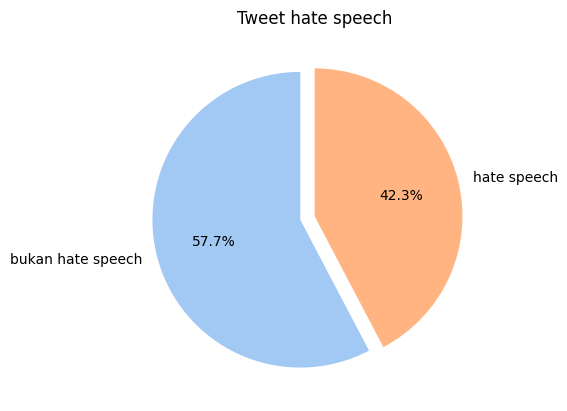

In [88]:
hs = df['HS'].value_counts()
hs.rename(index={0: "bukan hate speech",
                 1: "hate speech"},
          inplace=True)

colors = sns.color_palette('pastel')[0:5]

plt.pie(hs.values,
        labels = hs.index,
        colors = colors,
        autopct = '%1.1f%%',
        startangle = 90,
        explode = (0.1, 0))
plt.title('Tweet hate speech')
plt.show()

Total hate speech 42,3% dan Bukan hate speech 57%

In [120]:
df['HS'].value_counts()

HS
0    7526
1    5518
Name: count, dtype: int64

In [152]:
#Membuat Kolom Type

def tweet(x):
    if x['HS'] == 1 and x['Abusive'] == 1:
        return 'Hate Speech & Abusive'
    elif x['HS'] == 1 and x['HS'] == 1:
        return 'Hate Speech'

df['Type'] = df.apply(tweet, axis=1)

In [153]:
df.head(3)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type,NHS
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Hate Speech
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,None,Hate Speech
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,None,Hate Speech


In [154]:
df['Type'].value_counts()

Type
Hate Speech & Abusive    3262
Hate Speech              2256
Name: count, dtype: int64

<Axes: ylabel='count'>

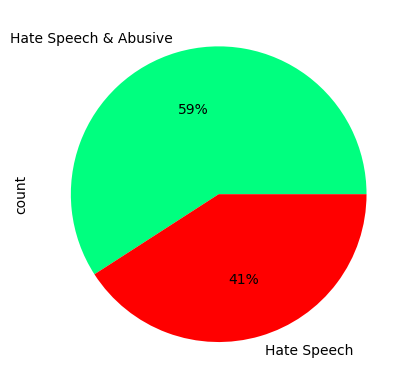

In [155]:
# Visualisasi

df['Type'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['#00FF7F','#FF0000','#FFD700','#F0E68C'])

##### Penggunaan kata kata Abusive dalam Hate Speech ternyata termasuk tinggi, 59% Kata-kata Hate Speech mengandung kata abusive

### Level Hate Speech

In [62]:
# membuat data frame level

df_level = df[(df['HS_Weak'] == 1) | (df['HS_Moderate']==1) | (df['HS_Strong']==1)].reset_index()

In [63]:
def target(x):
    if x['HS_Individual'] == 1 and x['HS_Group'] == 1:
        return 'Both'
    elif x['HS_Individual'] == 1 and x['HS_Group'] == 0:
        return 'Individual'
    elif x['HS_Individual'] == 0 and x['HS_Group'] == 1:
        return 'Group'
    else:
        return 'None'

df['Target'] = df.apply(target, axis=1)

In [64]:
# Tweet target classification

filter = df['Target'] == 'None'
df[~filter]['Target'].value_counts()

Target
Individual    3540
Group         1978
Name: count, dtype: int64

In [65]:
# Membuat kolom level negatif

def level(x):
    if x['HS_Weak'] == 1:
        return 'Weak'
    elif x['HS_Moderate'] == 1:
        return 'Moderate'
    elif x['HS_Strong'] == 1:
        return 'Strong'
    else:
        return 'None'
    
df_level['Level'] = df_level.apply(level, axis = 1)

In [66]:
# Select interesting column

df_level = pd.DataFrame(df_level, columns=['index', 'Level'])

# Take a look at dataframe

df_level.head()

,index,Level
0,0,Weak
1,4,Moderate
2,5,Moderate
3,10,Weak
4,11,Weak


In [67]:
df_topic = df[df['Target'] != 'None'].reset_index()

In [68]:
# Join df_level and df_topic

df = pd.merge(df_topic, df_level, on='index').drop(['index'], axis=1)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Type,Target,Level
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Individual,Weak
1,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Hate Speech & Abusive,Group,Moderate
2,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0,Hate Speech & Abusive,Group,Moderate
3,"Setidaknya gw punya jari tengah buat lu, sebel...",1,1,1,0,0,0,0,0,1,1,0,0,Hate Speech & Abusive,Individual,Weak
4,USER USER USER USER BANCI KALENG MALU GA BISA ...,1,1,1,0,0,0,0,1,0,1,0,0,Hate Speech & Abusive,Individual,Weak


In [69]:
# membuat kolom topik

def HStopic(x):
    if x['HS_Religion'] == 1:
        return 'Religion'
    elif x['HS_Race'] == 1:
        return 'Race'
    elif x['HS_Physical'] == 1:
        return 'Physical'
    elif x['HS_Gender'] == 1:
        return 'Gender' 
    else:
        return 'Other'
    
df_topic['Topic'] = df_topic.apply(HStopic, axis = 1)

In [70]:
# Select interesting column

df_topic = pd.DataFrame(df_topic, columns=['index', 'Topic'])

# Take a look at dataframe

df_topic.head()

,index,Topic
0,0,Other
1,4,Religion
2,5,Other
3,10,Other
4,11,Gender


In [71]:
df = pd.merge(df_topic, df_level, on='index').drop(['index'], axis=1)
df.head()

,Topic,Level
0,Other,Weak
1,Religion,Moderate
2,Other,Moderate
3,Other,Weak
4,Gender,Weak


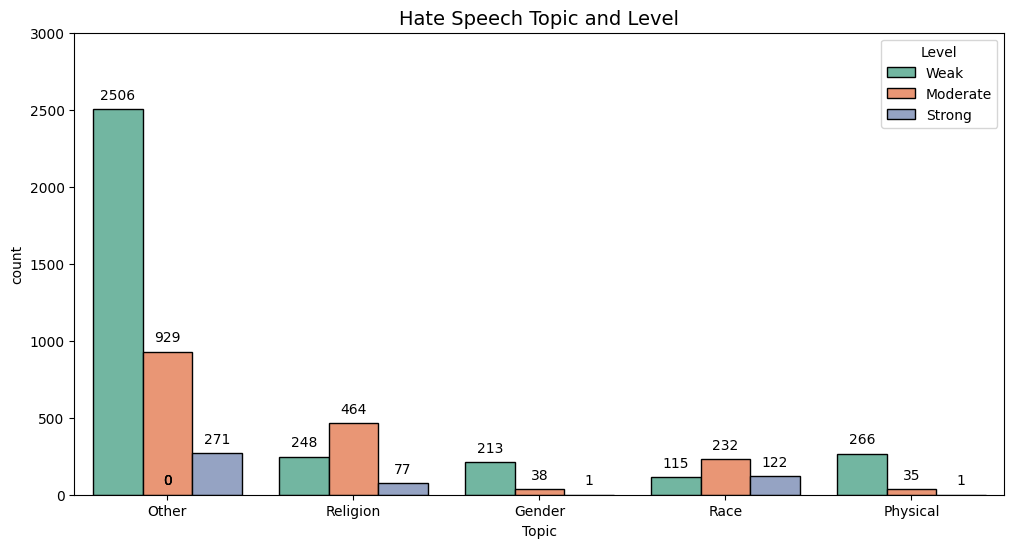

In [72]:
#Visualisasi

plt.figure(figsize=(12, 6))

plots = sns.countplot(x='Topic',hue='Level',data=df, palette='Set2', edgecolor='black')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 10),
                   textcoords='offset points')

plt.ylim(0,3000)
plt.title('Hate Speech Topic and Level',fontsize=14)
plt.show()

Topik ujaran kebencian yang sering dibicarakan adalah topik umum (other), disusul cuitan negatif dengan topik agama. Begitu pula dari tingkat ujaran kebencian yang mayoritas dibicarakan pada topik umum dan diikuti dengan topik agama (Other).

### Kesimpulan

1. Terdapat 57% Kalimat yang bukan hate speech dan 43% Kalimat hate speech
2. Penggunaan kata kata kasar pada ujaran kebencian mencapai 59%
3. Topik ujaran kebencian yang sering dibicarakan adalah topik umum (other), disusul cuitan negatif dengan topik agama. Begitu pula dari tingkat ujaran kebencian yang mayoritas dibicarakan pada topik umum dan diikuti dengan topik agama (Other).